In [23]:
from qutip import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def oracle(x,dim):
    array = [ ]
    if x>dim:
        return("dim error: dim should greater or equal to x")
    for i in range(dim):
        if i+1==x:
            array.append([1])
        else:
            array.append([0])
    return(array)

In [25]:
def diffusor(s):
    #the input state should be ket
    sm = [ ]
    dim = s.dims[0][0]
    for i in range(dim):
        numi = s[i][0][0]
        sm.append([ ])
        for j in range(dim):
            numj = s[j][0][0]
            sm[i].append(2*np.conj(numi)*numj)
            if i == j:
                sm[i][j] = sm[i][j]-1
    return(sm)

In [26]:
#in the first register
R1 = [ ]
dim_R1 = 32
N1 = 1/np.sqrt(32)


for i in range(dim_R1):
    R1.append(Qobj(oracle(i+1,dim_R1)))

R1

[Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[32], [1]], shape = (32, 1), type = ket
 Qobj data =
 [[0.]
  [

In [27]:
#in the second register
R2 = [ ]
dim_R2 = 16
N2 = 1/np.sqrt(16)


for i in range(dim_R2):
    R2.append(Qobj(oracle(i+1,dim_R2)))

R2

[Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims = [[16], [1]], sha

In [28]:
s=0
for i in range(dim_R2):
    s = s + R2[i]
s = N2 * s #the grover search state which is used to construct the diffusor
s

Quantum object: dims = [[16], [1]], shape = (16, 1), type = ket
Qobj data =
[[0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]]

In [29]:
#The inverse operator
uw = [ ]
for i in range(16):
    uw.append([ ])
    for j in range(16):
        if i==j:
            if j==0:     #do the inversion on the \ket{0} state in the second register
                uw[i].append(-1)
            else:
                uw[i].append(1)
        else:
            uw[i].append(0)
u_w = tensor(qeye(32),Qobj(uw))
u_w

Quantum object: dims = [[32, 16], [32, 16]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[-1.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]

In [30]:
#The diffusor
us = Qobj(diffusor(s))
u_s= tensor(qeye(32),us)
u_s

Quantum object: dims = [[32, 16], [32, 16]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[-0.875  0.125  0.125 ...  0.     0.     0.   ]
 [ 0.125 -0.875  0.125 ...  0.     0.     0.   ]
 [ 0.125  0.125 -0.875 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ... -0.875  0.125  0.125]
 [ 0.     0.     0.    ...  0.125 -0.875  0.125]
 [ 0.     0.     0.    ...  0.125  0.125 -0.875]]

In [31]:
target_set = [[0,0],[1,0],[2,0],[3,0],[4,3],[5,1],[6,12],[7,0],[8,4],[9,1],[10,1],[11,0],[12,5],[13,0],[14,2],[15,5],[16,3],[17,0]]

In [48]:
phi = 0.01*np.pi
dummy = 3
result = []
plot_source1 = []
plot_source2 = []
variables = []


for l in range(101):
    
    result.append([ ])
    #initial the phase
    phase = np.exp(complex(0,l*phi))
    
    #the searching state
    R12 = 0
    for i in range(16):
        for j in range(32):
            if [i,j] == target_set[i]:
                R12 = R12 + phase*tensor(R1[j],R2[i])
            else:
                R12 = R12 + tensor(R1[j],R2[i])
    R12 = N1*N2*R12
    ss = R12
    #ilteration
    for i in range(dummy):
        ss= u_s * u_w * ss
    
    #get the probabilities of states
    p1 = ss[0][0][0]* np.conj(ss[0][0][0])
    p2 = ss[1][0][0]* np.conj(ss[1][0][0])
    result[l].append(p1)
    result[l].append(p2)
    
#     p=0
#     for i in range(512):
#         p+= ss[i][0][0]* np.conj(ss[i][0][0])
#     if p>1:
#         print('error')
#         print(p)
#         print(l)
#         print(ss)
#         break

    plot_source1.append(p1)
    plot_source2.append(p2)
    variables.append(l*0.01*np.pi)

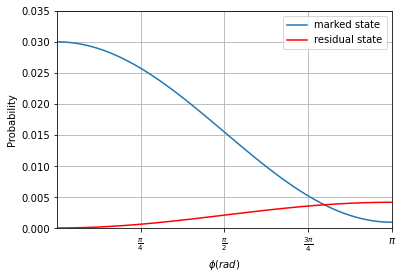

In [53]:
l1, = plt.plot(variables,plot_source1)
l2, = plt.plot(variables, plot_source2,color='red')
plt.legend(handles = [l1,l2],labels=['marked state','residual state'],loc='best')
plt.axis([0,np.pi,0,0.035])
plt.xlabel('$\phi (rad)$')
plt.ylabel('Probability')
plt.grid(True)

plt.xticks([0.25*np.pi, 0.5*np.pi,0.75*np.pi ,np.pi], [r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$'])

plt.show()